# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

#### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

>1. Do the users spend more time on the new landing page than on the existing landing page?
>2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
>3. Does the converted status depend on the preferred language?
>4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for statistic
import scipy.stats as stats

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Reading the Data into a DataFrame

In [2]:
# read the data
df = pd.read_csv('abtest.csv')



## Explore the dataset and extract insights using Exploratory Data Analysis

In [3]:
# returns the first 5 rows
df.head()



,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


In [4]:
# returns the last 5 rows
df.tail()



,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


In [5]:
#Checking the shape of the dataset
df.shape

(100, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
# checking for duplicate
df.duplicated().sum()

0

In [8]:
# checking if user_id is an unique value
df['user_id'].nunique()

100

In [9]:
# checking for null value
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


#### Observations: 
* The data frame consists of 6 columns and 100 rows  
* There is no duplicate row in the data frame
* The number of row is equal to the number of unique value of user_id. Therefore, we can confirm that user_id is the unique value of the data frame
* There are 2 numerical columns in the data and 4 object type columns.
* Time_spent_on_the_page: The average time users spent is 5.38 nimutes, which is very near to the median value 5.42 minutes. Users spent maximum 10 minutes and mininum 0,2 minutes 

### Univariate Analysis

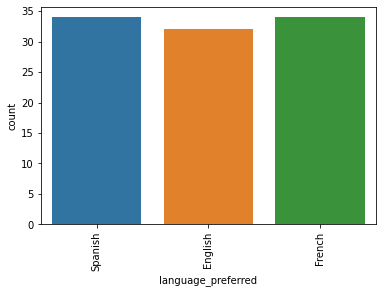

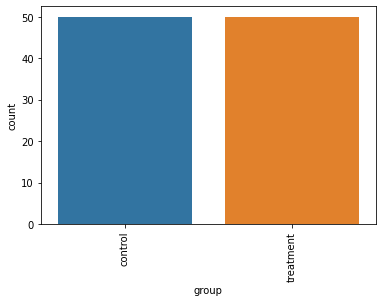

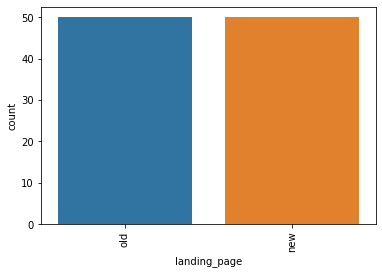

In [11]:
sns.countplot(data=df,x= 'language_preferred')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df,x= 'group')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df,x= 'landing_page')
plt.xticks(rotation=90)
plt.show()

The data has equally divided into two types of landing pages (old and new), two types of group (treatment and control) and 3 types of preferred language (English, French and Spanish)

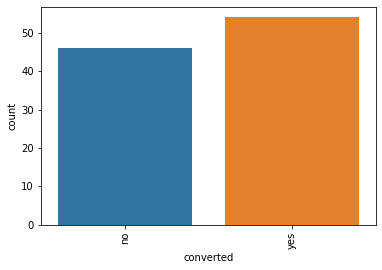

In [12]:
sns.countplot(data=df,x= 'converted')
plt.xticks(rotation=90)
plt.show()

The chance that users successfully converted is around 50%

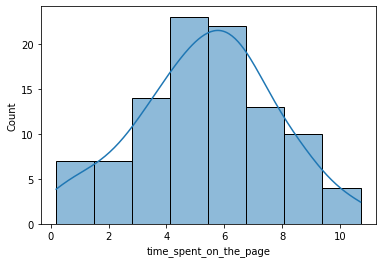

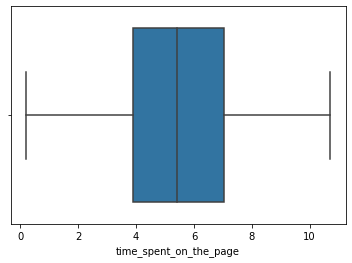

In [13]:
sns.histplot(data=df, x='time_spent_on_the_page',kde = True)
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

The time that users spent on the page is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

### Bivariate Analysis

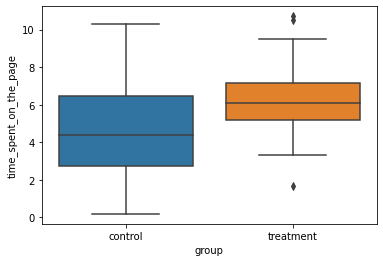

In [14]:
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.show();

The median of the treatment group is around 6 minutes, which is slightly higher than the median of the control group (around 4.2 minutes)

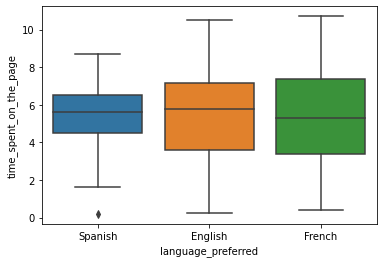

In [15]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show();

The median of time users spent on each language group are approximatley equal and only Spanish group has outliner value

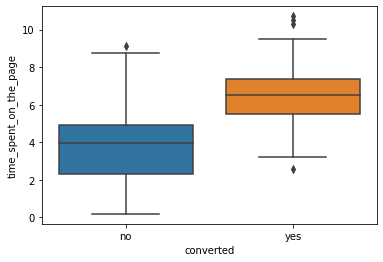

In [16]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show();

It is clearly that the subcribers spent more time on the website than other user (non-subcribers)

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

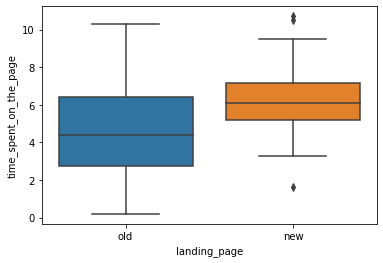

In [17]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the mean of Time spent on  **New** and **Old** landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

* Continuous data - Yes, the Time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations. 
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Base on points above, We can use two sample T-test (one-tailed test)

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [18]:
# find the sample means and sample standard deviations for the two samples
df1 = df[df['landing_page']== 'new']
df2 = df[df['landing_page']== 'old']
print('The mean of Time spent on New landing page is ' + str(round(df1['time_spent_on_the_page'].mean(),2)))
print('The mean of Time spent on Old landing page is ' + str(round(df2['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of Time spent on New landing page is ' + str(round(df1['time_spent_on_the_page'].std(),2)))
print('The standard deviation of Time spent on Old landing page is ' + str(round(df2['time_spent_on_the_page'].std(),2)))

The mean of Time spent on New landing page is 6.22
The mean of Time spent on Old landing page is 4.53
The standard deviation of Time spent on New landing page is 1.82
The standard deviation of Time spent on Old landing page is 2.58


* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

In [19]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df1['time_spent_on_the_page'], df2['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis. 

### Step 7:  Draw inference

Hence, we do have enough evidence to support the claim that the users spend more time on the new landing page than the existing landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis


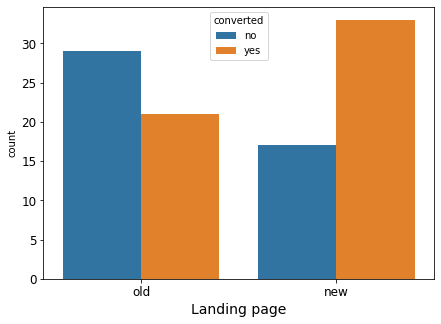

In [20]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'landing_page', hue = 'converted')
plt.xticks(size =12)
plt.xlabel('Landing page', size = 14)
plt.yticks(size = 12)

plt.show()

### Step 1: Define the null and alternate hypotheses
Let $p_1,p_2$ be the conversion of the new page and old page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

*   Binomally distributed population - Yes, a conversion is either yes or no
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  

We can use 2 Proportion Z-test (one-tailed test)




### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [21]:
#treatment group
total_treatment = df1.group.value_counts()
coversion_rate_treatment = df1['converted'].value_counts()['yes']

#control group
total_control = df2.group.value_counts()
coversion_rate_control = df2['converted'].value_counts()['yes']

print (total_treatment )
print (coversion_rate_treatment)
print (total_control )
print (coversion_rate_control)

treatment    50
Name: group, dtype: int64
33
control    50
Name: group, dtype: int64
21


*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$n_1p_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n_1(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
n_2p_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n_2(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Step 5: Calculate the p-value

In [22]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest


# find the p-value

test_stat, p_value = proportions_ztest([33, 21] , [50, 50], alternative ='larger')
print('The p-value is', p_value)


The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$  and Draw inference

As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the conversion rate of new page is greater than old page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis



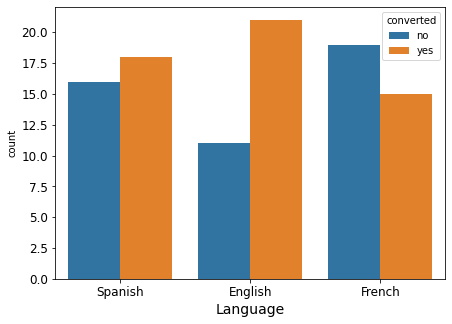

In [23]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'language_preferred', hue = 'converted')
plt.xticks(size =12)
plt.xlabel('Language', size = 14)
plt.yticks(size = 12)

plt.show()

### Step 1: Define the null and alternate hypotheses



We will test the null hypothesis

>$H_0:$ Conversion is independent of Preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on Preferred language.

### Step 2: Select Appropriate test

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use Chi-square test for Independence

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [24]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table.head()

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [25]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$  and Draw inference

As the p-value (~0.21) is greater than the level of significance, we can not reject the null hypothesis. Hence, we do have enough evidence to support the claim that Conversion is independent of Preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis



language_preferred
English   6.664
French    6.196
Spanish   5.835
Name: time_spent_on_the_page, dtype: float64


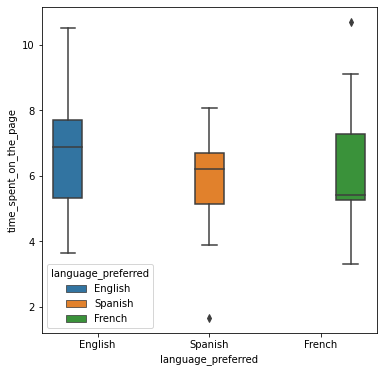

In [26]:
# mean of carbon emission at different levels of the fuel_type factor
print(df1.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df1, hue = 'language_preferred')
#a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)", fontsize=15)
plt.show();

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2, \mu_3$ be the means of Time spent on the new page for Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language is different from the rest.



### Step 2: Select Appropriate test

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on new page follow a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on new page does not follow a normal distribution

In [27]:
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df1['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the Time spent on new page follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [28]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df1['time_spent_on_the_page'][df1['language_preferred']=="English"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="French"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

We can use One-way ANOVA test


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [29]:
df1['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

### Step 5: Calculate the p-value

In [30]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df1.loc[df1['language_preferred'] == 'English', 'time_spent_on_the_page'],
                             df1.loc[df1['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df1.loc[df1['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$  and Draw inference

As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do have enough statistical significance to conclude that Time spent on new page is same for different language users

## Conclusion and Business Recommendations

1. The users tend to spend more time on the new landing page than the old one. Moreover,the new landing page has higher conversion rate, hence we can conclude that the new landing page is more effective than the old page.

2. We do not have enough statistical evidence to claim that different language users group has different time spent on new landing page as well as the conversion rate. It is quite clear that language does not affect the time users spent on website and the conversion rate.


___